### Conditional Characterization LBNL Output
    Project:  MAExSustento
    Date:     3/1/2021

In [184]:
import os
os.getcwd()

os.chdir('/Users/madelyncaufield/Desktop/Sustainability Project')

In [185]:
import pandas as pd
import numpy as np

# Import simulation data
simdat = pd.read_csv("Free (Basic).csv")
# Import HVAC data
hvac = pd.read_csv("LA_HVAC_results.csv")
print('Pre-merge:','\n',simdat.shape, '\n', hvac.shape)

# Merge dataframes
merged = pd.merge(simdat, hvac, left_on="ubid", right_on="LA_bid")
print("Post-merge:","\n", merged.shape)
merged.head()

Pre-merge: 
 (486, 105) 
 (243, 5)
Post-merge: 
 (486, 110)


,building id,building name,user defined building id,ubid,building type,year built (year),height (m),number of stories,total floor area (m2),baseline annual site energy use intensity (kWh/m2),...,Applicable ECM name 18,Applicable ECM ID 19,Applicable ECM name 19,Applicable ECM ID 20,Applicable ECM name 20,citybes_id,LA_bid,HVAC_system_type,number_of_HVAC_units,average_cooling_capacity_per_HVAC_unit(kW)
0,7622814,NaN,NaN,390574910969,Large Office,1984,9.34,3,22656.0624,185.8748,...,NaN,NaN,NaN,NaN,NaN,7622814,390574910969,central chiller + boiler (VAV with reheat),1,2076.961865
1,7622814,NaN,NaN,390574910969,Large Office,1984,9.34,3,22656.0624,185.8748,...,NaN,NaN,NaN,NaN,NaN,7622814,390574910969,central chiller + boiler (VAV with reheat),1,2076.961865
2,7622823,NaN,NaN,473982833569,Multi Family House,1971,11.39,4,6243.4108,90.5098,...,NaN,NaN,NaN,NaN,NaN,7622823,473982833569,split system air conditioner+gas furnace - eac...,57,3.612856
3,7622823,NaN,NaN,473982833569,Multi Family House,1971,11.39,4,6243.4108,90.5098,...,NaN,NaN,NaN,NaN,NaN,7622823,473982833569,split system air conditioner+gas furnace - eac...,57,3.612856
4,7622820,NaN,NaN,476177833534,Multi Family House,1979,13.33,4,8153.4328,82.8352,...,NaN,NaN,NaN,NaN,NaN,7622820,476177833534,split system air conditioner+gas furnace - eac...,75,2.712154


In [186]:
# Define new dataframes based on baseline vs. retrofit
baseline = merged[merged['retrofit package name']=='baseline']
retrofit = merged[merged['retrofit package name']=='ECM Package 1']

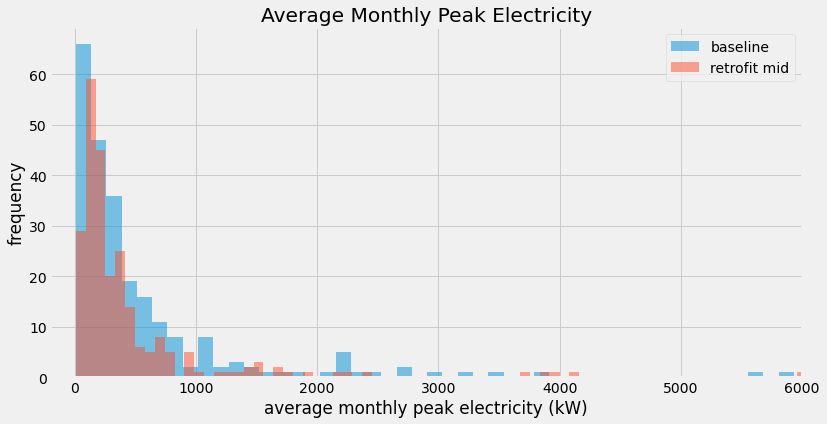

In [187]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlim(-200,6000)

plt.hist(baseline['baseline average monthly peak electricity (kW)'], bins=75, alpha=0.5, label='baseline')
plt.hist(retrofit['retrofit average monthly peak electricity (kW)'], bins=75, alpha=0.5, label='retrofit mid')
plt.legend(loc='upper right')

plt.title('Average Monthly Peak Electricity')
ax.set_xlabel('average monthly peak electricity (kW)')
ax.set_ylabel('frequency')

plt.show()

In [188]:
data = (pd.concat([simdat, hvac.reindex(simdat.index)], axis=1))
data
df = data.rename(columns={'building type': 'building_type', 'annual source energy use intensity saving (kWh/m2)': 'annual_source_use_energy_intensity_saving'})
df

,building id,building name,user defined building id,ubid,building_type,year built (year),height (m),number of stories,total floor area (m2),baseline annual site energy use intensity (kWh/m2),...,Applicable ECM name 18,Applicable ECM ID 19,Applicable ECM name 19,Applicable ECM ID 20,Applicable ECM name 20,citybes_id,LA_bid,HVAC_system_type,number_of_HVAC_units,average_cooling_capacity_per_HVAC_unit(kW)
0,7622814,NaN,NaN,390574910969,Large Office,1984,9.34,3,22656.0624,185.8748,...,NaN,NaN,NaN,NaN,NaN,7622804.0,3.826819e+11,split system air conditioner+gas furnace - eac...,60.0,2.387032
1,7622814,NaN,NaN,390574910969,Large Office,1984,9.34,3,22656.0624,185.8748,...,NaN,NaN,NaN,NaN,NaN,7622805.0,3.799779e+11,Packaged rooftop (VAV with reheat)-each story ...,3.0,271.489249
2,7622823,NaN,NaN,473982833569,Multi Family House,1971,11.39,4,6243.4108,90.5098,...,NaN,NaN,NaN,NaN,NaN,7622806.0,3.901779e+11,central chiller + boiler (VAV with reheat),1.0,961.846331
3,7622823,NaN,NaN,473982833569,Multi Family House,1971,11.39,4,6243.4108,90.5098,...,NaN,NaN,NaN,NaN,NaN,7622807.0,3.884799e+11,central chiller + boiler (VAV with reheat),1.0,1295.624115
4,7622820,NaN,NaN,476177833534,Multi Family House,1979,13.33,4,8153.4328,82.8352,...,NaN,NaN,NaN,NaN,NaN,7622808.0,3.787009e+11,Packaged rooftop (VAV with reheat)-each story ...,3.0,204.785168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,7623081,NaN,NaN,397736888191,Medium Office,1977,6.17,2,5900.9034,146.5646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,7623078,NaN,NaN,397870888153,Medium Office,1977,6.41,2,6021.5242,149.1905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,7623078,NaN,NaN,397870888153,Medium Office,1977,6.41,2,6021.5242,149.1905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,7623080,NaN,NaN,397662888193,Medium Office,1977,6.02,2,6045.0814,146.8926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ['annual_source_use_energy_intensity_saving'], inplace=True)
df

,building id,building name,user defined building id,ubid,building_type,year built (year),height (m),number of stories,total floor area (m2),baseline annual site energy use intensity (kWh/m2),...,Applicable ECM name 18,Applicable ECM ID 19,Applicable ECM name 19,Applicable ECM ID 20,Applicable ECM name 20,citybes_id,LA_bid,HVAC_system_type,number_of_HVAC_units,average_cooling_capacity_per_HVAC_unit(kW)
1,7622814,NaN,NaN,390574910969,Large Office,1984,9.34,3,22656.0624,185.8748,...,NaN,NaN,NaN,NaN,NaN,7622805.0,3.799779e+11,Packaged rooftop (VAV with reheat)-each story ...,3.0,271.489249
3,7622823,NaN,NaN,473982833569,Multi Family House,1971,11.39,4,6243.4108,90.5098,...,NaN,NaN,NaN,NaN,NaN,7622807.0,3.884799e+11,central chiller + boiler (VAV with reheat),1.0,1295.624115
5,7622820,NaN,NaN,476177833534,Multi Family House,1979,13.33,4,8153.4328,82.8352,...,NaN,NaN,NaN,NaN,NaN,7622809.0,3.897039e+11,central chiller + boiler (VAV with reheat),1.0,1149.086620
7,7622817,NaN,NaN,382959906334,Multi Family House,1986,10.84,3,3214.6710,96.1825,...,NaN,NaN,NaN,NaN,NaN,7622813.0,4.967959e+11,split system air conditioner+gas furnace - eac...,48.0,4.762106
9,7622819,NaN,NaN,467157838988,Multi Family House,1971,11.79,4,7968.3128,91.8548,...,NaN,NaN,NaN,NaN,NaN,7622817.0,3.829599e+11,split system air conditioner+gas furnace - eac...,39.0,2.641526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,7623072,NaN,NaN,410203880794,Large Office,1984,20.53,7,7409.4657,199.3458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,7623075,NaN,NaN,441541884154,Multi Family House,1995,9.05,3,16563.8250,69.1457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,7623081,NaN,NaN,397736888191,Medium Office,1977,6.17,2,5900.9034,146.5646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,7623078,NaN,NaN,397870888153,Medium Office,1977,6.41,2,6021.5242,149.1905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
value_list = ['Large Office' ]
df[df.building_type.isin(value_list)]

,building id,building name,user defined building id,ubid,building_type,year built (year),height (m),number of stories,total floor area (m2),baseline annual site energy use intensity (kWh/m2),...,Applicable ECM name 18,Applicable ECM ID 19,Applicable ECM name 19,Applicable ECM ID 20,Applicable ECM name 20,citybes_id,LA_bid,HVAC_system_type,number_of_HVAC_units,average_cooling_capacity_per_HVAC_unit(kW)
1,7622814,NaN,NaN,390574910969,Large Office,1984,9.34,3,22656.0624,185.8748,...,NaN,NaN,NaN,NaN,NaN,7622805.0,3.799779e+11,Packaged rooftop (VAV with reheat)-each story ...,3.0,271.489249
11,7622825,NaN,NaN,381148887557,Large Office,1980,21.81,7,8393.0700,203.6357,...,NaN,NaN,NaN,NaN,NaN,7622819.0,4.671578e+11,split system air conditioner+gas furnace - eac...,75.0,3.412947
15,7622811,NaN,NaN,390137909055,Large Office,1989,11.33,4,13868.5532,188.9509,...,NaN,NaN,NaN,NaN,NaN,7622825.0,3.811489e+11,central chiller + boiler (VAV with reheat),1.0,1062.349702
19,7622809,NaN,NaN,389703910175,Large Office,1984,10.21,3,11647.7364,190.1382,...,NaN,NaN,NaN,NaN,NaN,7622830.0,3.803749e+11,Packaged rooftop (VAV with reheat)-each story ...,3.0,325.207489
21,7622807,NaN,NaN,388479907490,Large Office,1966,6.76,2,13590.4504,202.6859,...,NaN,NaN,NaN,NaN,NaN,7622832.0,3.785459e+11,split system air conditioner+gas furnace - eac...,15.0,3.466970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,7623052,NaN,NaN,441843890451,Large Office,1979,16.82,6,15231.1626,190.7289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,7623043,NaN,NaN,419932921789,Large Office,1988,25.44,9,15766.4988,194.2185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,7623056,NaN,NaN,412874895178,Large Office,1973,17.03,6,13705.5966,213.0282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,7623068,NaN,NaN,413869880015,Large Office,1980,50.41,9,43162.0974,215.0317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
arr_LO = df["annual_source_use_energy_intensity_saving"].to_numpy()
arr_LO

array([148.5208,   5.304 ,   3.7392,   6.5733,   4.6603, 184.8131,
         5.7234, 157.1819, 139.513 , 155.6929, 184.524 , 156.8675,
         5.7158,   5.8589, 142.4087, 173.6501, 150.7833,   2.6184,
       168.742 ,   7.1537,   5.5046, 211.2922,   7.4957, 197.8623,
       146.8657, 216.3694, 152.6427,   8.3084, 190.063 ,   5.4958,
       179.5219,   6.4323, 144.7111,   5.1741, 137.1859, 136.6733,
         2.0747, 183.8714,   4.9181,   1.4558, 234.3641, 245.8157,
         7.6443,   7.1672,   3.9364,   1.8079,   4.9116,   2.9775,
         5.2319,   4.8594, 236.1753,   4.8225, 315.0838,   1.5547,
       244.3858,   1.0905, 258.262 ,   4.7771, 269.9685,   4.1507,
         4.4624,   4.1767,   5.3395,   7.9355,   3.2969,   2.2315,
       221.5883, 183.6876,   5.1881,   5.7378, 179.7396,   1.1571,
         3.846 , 216.9949, 184.9162, 223.237 , 244.1925,   5.306 ,
       236.9364,   2.8655,   5.5284,   3.6902,   5.5421, 217.7374,
         1.1296,   5.1601,   5.9123, 186.9953,   4.4359, 242.3

In [192]:
large_off_med = (np.median(arr_LO))
large_off_med

136.055

In [193]:
value_list = ['Multi Family House' ]
data = (df[df.building_type.isin(value_list)])
data

,building id,building name,user defined building id,ubid,building_type,year built (year),height (m),number of stories,total floor area (m2),baseline annual site energy use intensity (kWh/m2),...,Applicable ECM name 18,Applicable ECM ID 19,Applicable ECM name 19,Applicable ECM ID 20,Applicable ECM name 20,citybes_id,LA_bid,HVAC_system_type,number_of_HVAC_units,average_cooling_capacity_per_HVAC_unit(kW)
3,7622823,NaN,NaN,473982833569,Multi Family House,1971,11.39,4,6243.4108,90.5098,...,NaN,NaN,NaN,NaN,NaN,7622807.0,3.884799e+11,central chiller + boiler (VAV with reheat),1.0,1295.624115
5,7622820,NaN,NaN,476177833534,Multi Family House,1979,13.33,4,8153.4328,82.8352,...,NaN,NaN,NaN,NaN,NaN,7622809.0,3.897039e+11,central chiller + boiler (VAV with reheat),1.0,1149.086620
7,7622817,NaN,NaN,382959906334,Multi Family House,1986,10.84,3,3214.6710,96.1825,...,NaN,NaN,NaN,NaN,NaN,7622813.0,4.967959e+11,split system air conditioner+gas furnace - eac...,48.0,4.762106
9,7622819,NaN,NaN,467157838988,Multi Family House,1971,11.79,4,7968.3128,91.8548,...,NaN,NaN,NaN,NaN,NaN,7622817.0,3.829599e+11,split system air conditioner+gas furnace - eac...,39.0,2.641526
13,7622804,NaN,NaN,382681906783,Multi Family House,1986,10.64,3,4815.6597,92.7864,...,NaN,NaN,NaN,NaN,NaN,7622823.0,4.739828e+11,split system air conditioner+gas furnace - eac...,57.0,3.612856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,7623074,NaN,NaN,399332887733,Multi Family House,1970,6.65,2,6143.4446,91.9617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,7623060,NaN,NaN,391869896539,Multi Family House,1985,12.11,4,2330.7900,98.3818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,7623082,NaN,NaN,418772879441,Multi Family House,1984,15.03,5,11450.4695,79.1434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,7623065,NaN,NaN,444925887972,Multi Family House,1991,15.28,5,23535.3035,73.4263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
arr_MFH = data["annual_source_use_energy_intensity_saving"].to_numpy()
arr_MFH

array([ 5.304 ,  3.7392,  6.5733,  4.6603,  5.7234,  5.7158,  5.8589,
        2.6184,  7.1537,  5.5046,  7.4957,  8.3084,  5.4958,  6.4323,
        5.1741,  2.0747,  4.9181,  1.4558,  7.6443,  7.1672,  3.9364,
        1.8079,  4.9116,  2.9775,  5.2319,  4.8594,  4.8225,  1.5547,
        1.0905,  4.7771,  4.1507,  4.4624,  4.1767,  5.3395,  7.9355,
        3.2969,  2.2315,  5.1881,  5.7378,  1.1571,  3.846 ,  5.306 ,
        2.8655,  5.5284,  3.6902,  5.5421,  1.1296,  5.1601,  5.9123,
        4.4359,  5.0167,  3.0011,  2.7257,  1.6908,  4.8382,  1.7096,
        5.3274,  1.0298,  0.7428,  3.0628,  5.6106,  1.2207,  1.5766,
        1.7638,  1.4898,  2.0322,  1.1613,  2.1051,  2.775 ,  2.586 ,
        1.6445,  8.5639,  5.8066,  2.7081,  4.3147,  3.2569,  3.3089,
        6.0111,  3.9025,  2.2585,  2.5628,  2.6785,  3.2549,  4.5797,
        1.1503,  6.5928, 11.7812,  2.9058,  2.1369,  4.5246,  6.171 ,
        6.123 ,  3.6064,  5.5328,  5.4808,  5.4252,  4.5121,  5.7882,
        1.909 ,  1.9

In [195]:
mf_house_med = (np.median(arr_MFH))
mf_house_med

4.1637

In [196]:
value_list = ['Small Retail' ]
datar = (df[df.building_type.isin(value_list)])
datar

,building id,building name,user defined building id,ubid,building_type,year built (year),height (m),number of stories,total floor area (m2),baseline annual site energy use intensity (kWh/m2),...,Applicable ECM name 18,Applicable ECM ID 19,Applicable ECM name 19,Applicable ECM ID 20,Applicable ECM name 20,citybes_id,LA_bid,HVAC_system_type,number_of_HVAC_units,average_cooling_capacity_per_HVAC_unit(kW)
209,7622923,NaN,NaN,437292895970,Small Retail,1969,4.24,1,476.2378,343.3897,...,NaN,NaN,NaN,NaN,NaN,7623046.0,4.214549e+11,split system air conditioner+gas furnace - eac...,36.0,2.164972
317,7622981,NaN,NaN,457359858295,Small Retail,1988,4.91,1,468.6404,324.6917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
arr_SR = datar["annual_source_use_energy_intensity_saving"].to_numpy()
arr_SR

array([534.813 , 473.4517])

In [198]:
small_ret_med = (np.median(arr_SR))
small_ret_med

504.13235

In [199]:
value_list = ['Small Office' ]
dataSO = (df[df.building_type.isin(value_list)])
dataSO

,building id,building name,user defined building id,ubid,building_type,year built (year),height (m),number of stories,total floor area (m2),baseline annual site energy use intensity (kWh/m2),...,Applicable ECM name 18,Applicable ECM ID 19,Applicable ECM name 19,Applicable ECM ID 20,Applicable ECM name 20,citybes_id,LA_bid,HVAC_system_type,number_of_HVAC_units,average_cooling_capacity_per_HVAC_unit(kW)
367,7623017,NaN,NaN,420354896258,Small Office,1985,5.0,1,528.1524,250.324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
arr_SO = dataSO["annual_source_use_energy_intensity_saving"].to_numpy()
arr_SO

array([361.4024])

In [201]:
small_office_med = (np.median(arr_SO))
small_office_med

361.4024

In [202]:
value_list = ['Medium Retail' ]
dataMR = (df[df.building_type.isin(value_list)])
dataMR

,building id,building name,user defined building id,ubid,building_type,year built (year),height (m),number of stories,total floor area (m2),baseline annual site energy use intensity (kWh/m2),...,Applicable ECM name 18,Applicable ECM ID 19,Applicable ECM name 19,Applicable ECM ID 20,Applicable ECM name 20,citybes_id,LA_bid,HVAC_system_type,number_of_HVAC_units,average_cooling_capacity_per_HVAC_unit(kW)
105,7622870,NaN,NaN,436274875405,Medium Retail,1989,4.45,1,3318.7302,255.0990,...,NaN,NaN,NaN,NaN,NaN,7622927.0,4.333348e+11,central chiller + boiler (VAV with reheat),1.0,5232.597994
243,7622946,NaN,NaN,484909831704,Medium Retail,1989,6.27,2,2047.7512,248.6365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,7623006,NaN,NaN,446679807826,Medium Retail,1966,5.26,1,1205.8217,279.9245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,7623034,NaN,NaN,466703917206,Medium Retail,1981,5.52,1,1614.5590,338.6930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,7623069,NaN,NaN,416331879648,Medium Retail,1962,5.42,1,3270.9466,277.4416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,7623061,NaN,NaN,393418890894,Medium Retail,1958,8.38,2,3975.7404,270.2089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
arr_MR = dataMR["annual_source_use_energy_intensity_saving"].to_numpy()
arr_MR

array([315.0838, 319.0221, 385.7108, 296.1366, 383.4356, 380.9988])

In [204]:
med_ret_med = (np.median(arr_MR))
med_ret_med

350.01045

In [205]:
value_list = ['Medium Office' ]
dataMO = (df[df.building_type.isin(value_list)])
dataMO

,building id,building name,user defined building id,ubid,building_type,year built (year),height (m),number of stories,total floor area (m2),baseline annual site energy use intensity (kWh/m2),...,Applicable ECM name 18,Applicable ECM ID 19,Applicable ECM name 19,Applicable ECM ID 20,Applicable ECM name 20,citybes_id,LA_bid,HVAC_system_type,number_of_HVAC_units,average_cooling_capacity_per_HVAC_unit(kW)
17,7622805,NaN,NaN,379977910076,Medium Office,1985,10.57,3,7191.1326,137.5422,...,NaN,NaN,NaN,NaN,NaN,7622827.0,3.703859e+11,Packaged rooftop (VAV with reheat)-each story ...,3.0,265.048240
29,7622808,NaN,NaN,378700910044,Medium Office,1984,10.08,3,5088.4227,138.7755,...,NaN,NaN,NaN,NaN,NaN,7622842.0,3.797019e+11,Packaged rooftop (VAV with reheat)-each story ...,1.0,292.056856
49,7622842,NaN,NaN,379701884640,Medium Office,1980,4.04,1,2409.9359,141.6090,...,NaN,NaN,NaN,NaN,NaN,7622867.0,4.237869e+11,split system air conditioner+gas furnace - eac...,60.0,4.006063
53,7622826,NaN,NaN,373027883506,Medium Office,1983,14.58,5,3143.5980,142.1202,...,NaN,NaN,NaN,NaN,NaN,7622871.0,4.771398e+11,split system air conditioner+gas furnace - eac...,54.0,4.627030
65,7622827,NaN,NaN,370385882011,Medium Office,1978,10.81,3,6585.6969,140.0816,...,NaN,NaN,NaN,NaN,NaN,7622883.0,4.241488e+11,split system air conditioner+gas furnace - eac...,63.0,3.493162
69,7622830,NaN,NaN,380374893538,Medium Office,1983,10.57,3,8881.2645,136.7809,...,NaN,NaN,NaN,NaN,NaN,7622888.0,4.846508e+11,split system air conditioner+gas furnace - eac...,135.0,3.383400
71,7622847,NaN,NaN,382082891637,Medium Office,1979,9.41,3,6996.0564,136.0574,...,NaN,NaN,NaN,NaN,NaN,7622890.0,4.495419e+11,split system air conditioner+gas furnace - eac...,162.0,3.978410
141,7622880,NaN,NaN,428050844196,Medium Office,1972,13.79,4,6058.6252,154.1419,...,NaN,NaN,NaN,NaN,NaN,7622963.0,4.388009e+11,Packaged rooftop (VAV with reheat)-each story ...,2.0,401.329209
245,7622942,NaN,NaN,437640797966,Medium Office,1985,7.85,2,7183.3260,128.0868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,7622963,NaN,NaN,438800926181,Medium Office,1987,5.96,2,7088.2354,137.6004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
arr_MO = dataMO["annual_source_use_energy_intensity_saving"].to_numpy()
arr_MO

array([139.513 , 142.4087, 146.8657, 152.6427, 144.7111, 137.1859,
       136.6733, 179.7396, 122.8316, 143.1424, 178.0245, 133.9142,
       140.3378, 143.544 , 140.1831, 173.7175, 146.953 , 134.2705,
       182.6473, 189.3072, 158.5248, 141.0248, 136.055 , 159.7677,
       169.1509, 161.2696])

In [207]:
med_office_med = (np.median(arr_MO))
med_office_med

144.12754999999999

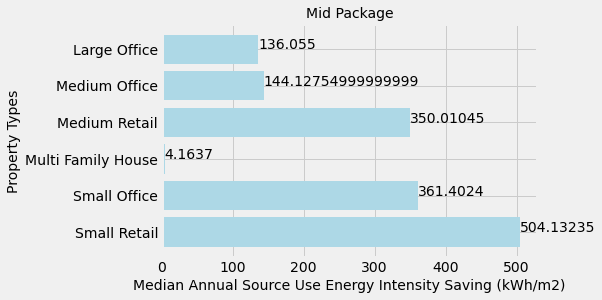

In [208]:
import matplotlib.pyplot as plt

Property_Types = ['Small Retail', 'Small Office', 'Multi Family House', 'Medium Retail', 'Medium Office', 'Large Office']
medians = [small_ret_med,small_office_med,mf_house_med,med_ret_med,med_office_med,large_off_med]

New_Colors = ['lightblue']
plt.barh(Property_Types, medians, color=New_Colors)
for index, value in enumerate(medians):
    plt.text(value, index, str(value))
plt.title('Mid Package', fontsize=14)
plt.xlabel('Median Annual Source Use Energy Intensity Saving (kWh/m2)', fontsize=14)
plt.ylabel('Property Types', fontsize=14)
plt.grid(True)
plt.show()


In [209]:
hist,bin_edges = np.histogram(arr_MFH)
hist

array([18, 23, 17, 17, 27,  9,  5,  1,  0,  1])

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline

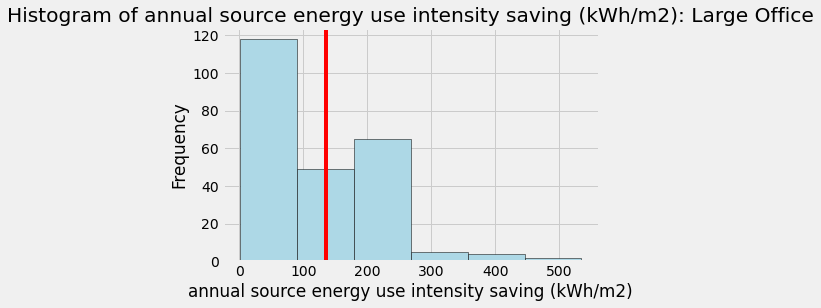

In [211]:
plt.style.use('fivethirtyeight')

#arr_LO
source_energy = df['annual_source_use_energy_intensity_saving']
#property_type = df['building_type']

plt.hist(source_energy,bins=6,edgecolor='black',color='lightblue')

median = large_off_med

plt.axvline(median, color ='red',label="Median")

plt.title('Histogram of annual source energy use intensity saving (kWh/m2): Large Office')
plt.xlabel('annual source energy use intensity saving (kWh/m2)')
plt.ylabel('Frequency')
plt.show()

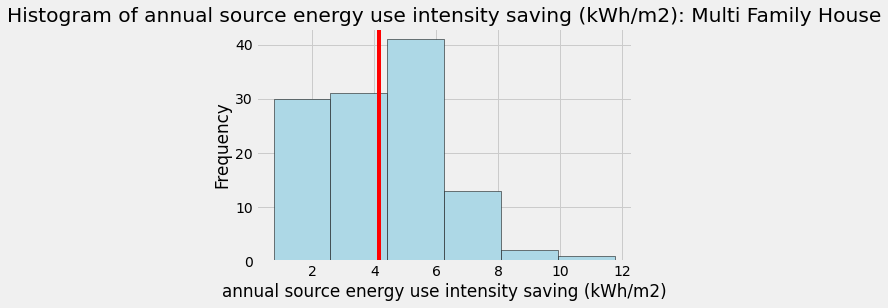

In [212]:
plt.style.use('fivethirtyeight')

#arr_mfh
source_energy = data['annual_source_use_energy_intensity_saving']
#property_type = df['building_type']

plt.hist(source_energy,bins=6,edgecolor='black',color='lightblue')

median = mf_house_med

plt.axvline(median, color ='red',label="Median")

plt.title('Histogram of annual source energy use intensity saving (kWh/m2): Multi Family House')
plt.xlabel('annual source energy use intensity saving (kWh/m2)')
plt.ylabel('Frequency')

plt.show()

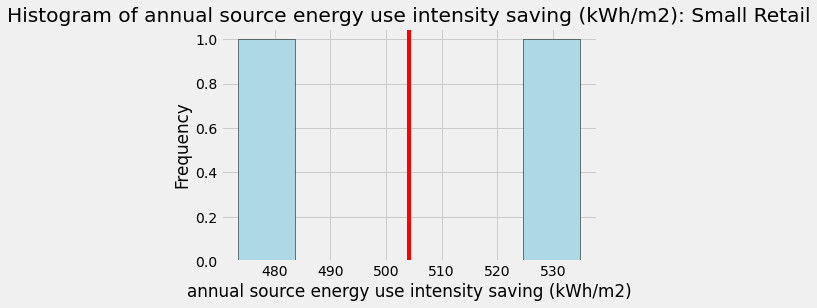

In [213]:
plt.style.use('fivethirtyeight')

#arr_sr
source_energy = datar['annual_source_use_energy_intensity_saving']
#property_type = df['building_type']

plt.hist(source_energy,bins=6,edgecolor='black',color='lightblue')

median = small_ret_med

plt.axvline(median, color ='red',label="Median")

plt.title('Histogram of annual source energy use intensity saving (kWh/m2): Small Retail')
plt.xlabel('annual source energy use intensity saving (kWh/m2)')
plt.ylabel('Frequency')
plt.show()

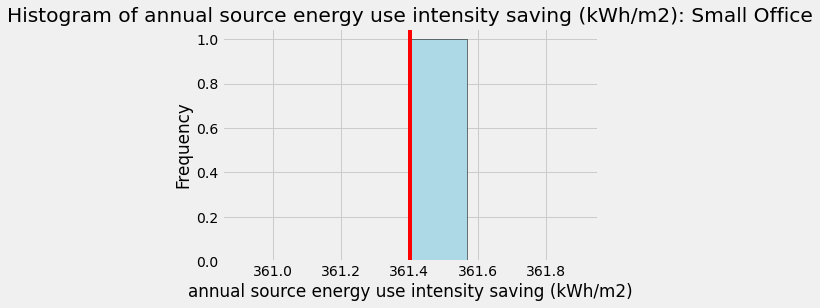

In [214]:
plt.style.use('fivethirtyeight')

#arr_so
source_energy = dataSO["annual_source_use_energy_intensity_saving"]
#property_type = df['building_type']

ax.set_facecolor('white')
plt.hist(source_energy,bins=6,edgecolor='black',color='lightblue')

median = small_office_med

plt.axvline(median, color ='red',label="Median")

plt.title('Histogram of annual source energy use intensity saving (kWh/m2): Small Office')
plt.xlabel('annual source energy use intensity saving (kWh/m2)')
plt.ylabel('Frequency')
plt.show()

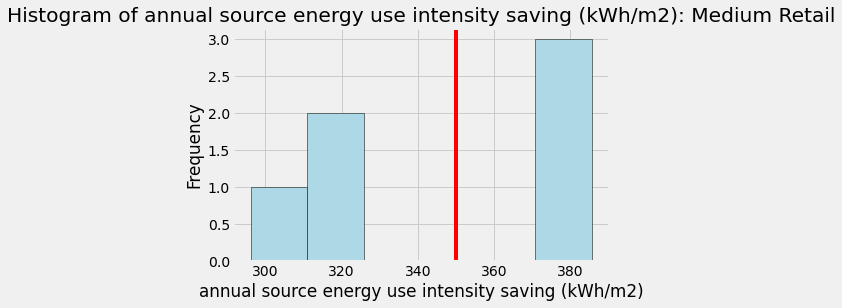

In [215]:
plt.style.use('fivethirtyeight')

#arr_mr
source_energy = dataMR["annual_source_use_energy_intensity_saving"]
#property_type = df['building_type']

plt.hist(source_energy,bins=6,edgecolor='black',color='lightblue')

median = med_ret_med

plt.axvline(median, color ='red',label="Median")

plt.title('Histogram of annual source energy use intensity saving (kWh/m2): Medium Retail')
plt.xlabel('annual source energy use intensity saving (kWh/m2)')
plt.ylabel('Frequency')
plt.show()

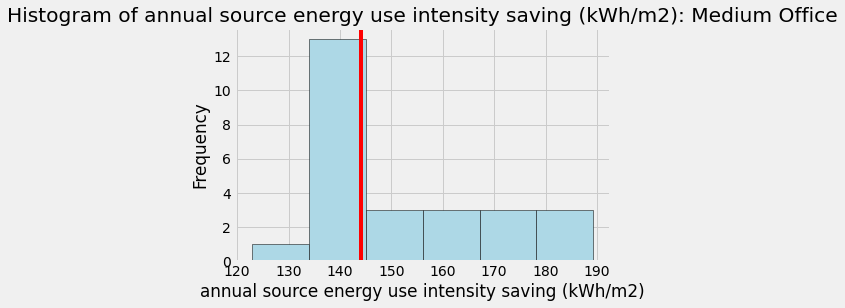

In [216]:
plt.style.use('fivethirtyeight')

#arr_mr
source_energy = dataMO["annual_source_use_energy_intensity_saving"]
#property_type = df['building_type']

plt.hist(source_energy,bins=6,edgecolor='black',color='lightblue')

median = med_office_med

plt.axvline(median, color ='red',label="Median")

plt.title('Histogram of annual source energy use intensity saving (kWh/m2): Medium Office')
plt.xlabel('annual source energy use intensity saving (kWh/m2)')
plt.ylabel('Frequency')
plt.show()